# Machine Learning ( Mini Project)

## Name - Ranvijay Patel Amarnath
### Roll No. - 1901156
### Email - ranvijay.amarnath@iiitg.ac.in

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Topic : Direct marketing campaigns (via phone calls). Goal is to   predict whether the client will subscribe to a term deposit.

# Import the Dataset

In [303]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
data = pd.read_csv("banking.csv")

In [304]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


In [305]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [306]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0
41187,25,student,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.859,5191.0,0


## Exploring the data set and unique values

In [311]:
data[list(data.columns)[:10]].head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu
1,53,technician,married,unknown,no,no,no,cellular,nov,fri
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu
3,39,services,married,high.school,no,no,no,cellular,apr,fri
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri


In [312]:
data[list(data.columns)[10:]].head()

,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


# Summary of neumerical data

In [238]:
# using describe we can understand numerical data how spread is and skewsness aslo.

data.describe()  

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [239]:
#using transpose function on describe function

data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp_var_rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons_price_idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons_conf_idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr_employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


# Information about the features

In [240]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [241]:
print("Age : ",data.age.unique())
print("-"*100)
print("All unique jobs : ",data['job'].unique())
print("-"*100)
print("Merital : ",data.marital.unique())
print("-"*100)
print("Education : ",data.education.unique())
print("-"*100)
print("default : ",data.default.unique())
print("-"*100)
print("housing : ",data.housing.unique())
print("-"*100)
print("loan : ",data.loan.unique())
print("-"*100)
print("contact : ",data.contact.unique())
print("-"*100)
print("month : ",data.month.unique())
print("-"*100)
print("day_of_week : ",data.day_of_week.unique())
print("-"*100)
print("duration : ",data.duration.unique())
print("-"*100)
print("campaign : ",data.campaign.unique())
print("-"*100)
print("pdays : ",data.pdays.unique())
print("-"*100)
print("previous : ",data.previous.unique())
print("-"*100)
print("poutcome : ",data.poutcome.unique())
print("-"*100)
print("emp_var_rate : ",data.emp_var_rate.unique())
print("-"*100)
print("cons_price_idx : ",data.cons_price_idx.unique())
print("-"*100)
print("cons_conf_idx : ",data.cons_conf_idx.unique())
print("-"*100)
print("euribor3m : ",data.euribor3m.unique())
print("-"*100)
print("nr_employed : ",data.nr_employed.unique())
print("-"*100)
print("-"*100)
print("Output Y : ",data.y.unique())


Age :  [44 53 28 39 55 30 37 36 27 34 41 33 26 52 35 40 32 49 38 47 46 29 54 42
 72 48 43 56 31 24 68 59 50 45 25 57 63 58 60 64 51 23 20 74 80 61 62 75
 21 82 77 70 76 73 66 22 71 19 79 88 65 67 81 18 84 69 98 85 83 78 92 86
 94 17 91 89 87 95]
----------------------------------------------------------------------------------------------------
All unique jobs :  ['blue-collar' 'technician' 'management' 'services' 'retired' 'admin.'
 'housemaid' 'unemployed' 'entrepreneur' 'self-employed' 'unknown'
 'student']
----------------------------------------------------------------------------------------------------
Merital :  ['married' 'single' 'divorced' 'unknown']
----------------------------------------------------------------------------------------------------
Education :  ['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']
----------------------------------------------------------------------------------------------------


In [242]:
corr = data.corr()

In [243]:
corr

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp_var_rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons_price_idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons_conf_idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr_employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


In [244]:
data.shape

(41188, 21)

# Preprocessing and Normlization of data using min max scaler technique

### Performing one-hot-encoding
 To convert our categorical features to numbers, we will use a technique called one-hot encoding. In one-hot encoding, you create a new column for each unique value in that column. Then the value of the column is 1 if the sample has that unique value or 0 otherwise. For example, for the column job, we would create new columns.

In [314]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder

data = pd.get_dummies(data)

In [321]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 64 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp_var_rate                   41188 non-null  float64
 6   cons_price_idx                 41188 non-null  float64
 7   cons_conf_idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr_employed                    41188 non-null  float64
 10  y                              41188 non-null  int64  
 11  job_admin.                     41188 non-null  uint8  
 12  job_blue-collar                41188 non-null 

In [315]:
data

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,222,1,999,0,1.4,94.465,-41.8,4.866,5228.1,...,0,0,0,0,1,0,0,0,1,0
41184,31,196,2,999,0,1.1,93.994,-36.4,4.860,5191.0,...,0,0,0,0,1,0,0,0,1,0
41185,42,62,3,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,1,0,1,0
41186,48,200,2,999,0,-3.4,92.431,-26.9,0.742,5017.5,...,1,0,0,0,0,1,0,0,1,0


In [326]:
data.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,...,0,0,0,0,1,0,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,...,0,0,1,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,...,0,0,0,0,1,0,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,...,0,0,1,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,...,0,0,1,0,0,0,0,0,0,1


In [327]:
data.tail()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
41183,59,222,1,999,0,1.4,94.465,-41.8,4.866,5228.1,...,0,0,0,0,1,0,0,0,1,0
41184,31,196,2,999,0,1.1,93.994,-36.4,4.860,5191.0,...,0,0,0,0,1,0,0,0,1,0
41185,42,62,3,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,0,0,0,1,0,1,0
41186,48,200,2,999,0,-3.4,92.431,-26.9,0.742,5017.5,...,1,0,0,0,0,1,0,0,1,0
41187,25,112,4,999,0,1.1,93.994,-36.4,4.859,5191.0,...,0,0,1,0,0,0,0,0,1,0


In [250]:
y_actual = data['y']
features = data.drop(['y'], axis = 1)

In [251]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(features)
features = scaler.transform(features)

# Splitting of the data 

### train velidation test 
So far we have explored our data and created features from the categorical data. It is now time for us to split our data. The idea behind splitting the data is so that you can measure how well your model would do on unseen data. We split into three parts.

Training samples: these are samples from the data set used to train the model. It can be 70% of the data.

Validation samples: these are samples used to validate or make decisions from the model. It can be 15% of the data.

Test samples: these are samples used to measure the accuracy or performace of the model. It can be 15% of the data.

In this project, we will split into 70% train, 15% validation, and 15% test.



In [252]:
# Train test validation
from sklearn.model_selection import train_test_split
import random
# train(70%), validation (15%), and test(15%)
X_train, X_test, y_train, y_test = train_test_split(features,y_actual , test_size=0.3, random_state=40)
X_test, X_validation, y_test, y_validation = train_test_split(X_test, y_test, test_size=0.5, random_state=40)
print("Size of the train dataset:",X_train.shape)
print("Size of the validation dataset:",X_validation.shape)
print("Size of the test dataset:",X_test.shape)

Size of the train dataset: (28831, 63)
Size of the validation dataset: (6179, 63)
Size of the test dataset: (6178, 63)


# Function for calculation of Accuracy, Recall, Precision, f1 score etc.

# Model selection
This section allows us to test various machine learning algorithm to see how our independent variables accurately predit our dependent y output variable. We will then select the best model based on performance on the validation set. We will utilize the following functions to evaluate the performance of the model.

In [253]:
from sklearn.metrics import confusion_matrix,roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

def specificity_cal(y_actual, y_pred, thresh):
    # calculation of specificity
    return sum((y_pred < thresh) & (y_actual == 0)) / sum(y_actual == 0)

def print_report(y_actual, y_pred, thresh):
    
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = specificity_cal(y_actual, y_pred , thresh)
    f1 = (2*(precision * recall)) / (precision + recall)
    
    print('AUC : %.3f'%auc)
    print('Accuracy : %.3f'%accuracy)
    print('recall : %.3f'%recall)
    print('precision : %.3f'%precision)
    print('specificity : %.3f'%specificity)
    print('f1 score : %.3f'%f1)
    print('Confusion Matrix : \n' + str(confusion_matrix(y_actual, y_pred > thresh)))
    print(' ')
    
    return auc, accuracy, recall, precision, specificity, f1


### Set a threshold
let's set our threshold at 0.5 to label a predicted sample as positive.

In [254]:
thresh = 0.5

# Model slection

In this section, we will first compare the performance of the following machine learning models using default hyperparameters:

- Logistic regression

- Stochastic gredient discent 

- Multilayer perceptron

### 1. Logistic regression model
Logsitic regression uses a line (Sigmoid function) in the form of an "S" to predict if the dependent variable is true or false based on the independent variables. The "S-shaped" curve (on the line graph) will show the probability of the dependent variable occuring based on where the points of the independent variables lands on the curve. In this case, the output (y) is predicted by the numerical and categorical variables defined as "x" such as age, education and so on. Logistic regresssion is best used for classifying samples.

Training and evaluating Logistic regression model

In [272]:
# training of the logistic regression model

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state = 42,max_iter=2048)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=2048, random_state=42)

In [322]:
print("Score of Logistic regression model : ",lr.score(X_test, y_test))

Score of Logistic regression model :  0.909841372612496


In [257]:
# Now we can evaluate the performance of the model

y_train_pred = lr.predict_proba(X_train)[:,1]
y_validation_pred = lr.predict_proba(X_validation,)[:,1]
y_test_pred = lr.predict_proba(X_test)[:,1]

print("logistic regression model")
print("-"*100)
print("Training")
auc, accuracy, recall, precision, specificity, f1 = print_report(y_train, y_train_pred, thresh)
print("Validation")
auc, accuracy, recall, precision, specificity, f1 = print_report(y_validation, y_validation_pred, thresh)
print("Testing")
auc, accuracy, recall, precision, specificity, f1 = print_report(y_test, y_test_pred, thresh)

logistic regression model
----------------------------------------------------------------------------------------------------
Training
AUC : 0.933
Accuracy : 0.910
recall : 0.393
precision : 0.668
specificity : 0.975
f1 score : 0.495
Confusion Matrix : 
[[24942   635]
 [ 1974  1280]]
 
Validation
AUC : 0.940
Accuracy : 0.915
recall : 0.411
precision : 0.676
specificity : 0.976
f1 score : 0.511
Confusion Matrix : 
[[5375  132]
 [ 396  276]]
 
Testing
AUC : 0.929
Accuracy : 0.910
recall : 0.380
precision : 0.704
specificity : 0.979
f1 score : 0.493
Confusion Matrix : 
[[5350  114]
 [ 443  271]]
 


### 2. stocastic gredient discent model
Stochastic Gradient Descent analyzes various sections of the data instead of the data as a whole and predicts the output using the independent variables. Stochastic Gradient Descent is faster than logistic regression in the sense that it doesn't run the whole dataset but instead looks at different parts of the dataset.

Training and evaluating Stochastic Gradient Descent model performance:

In [258]:
# stocastic gredient discent model

from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier(loss = 'log',alpha = 0.1, random_state = 42,verbose=True)
sgdc.fit(X_train, y_train)

-- Epoch 1
Norm: 0.57, NNZs: 63, Bias: -1.162621, T: 28831, Avg. loss: 0.315312
Total training time: 0.02 seconds.
-- Epoch 2
Norm: 0.57, NNZs: 63, Bias: -1.182948, T: 57662, Avg. loss: 0.314446
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 0.57, NNZs: 63, Bias: -1.197127, T: 86493, Avg. loss: 0.314482
Total training time: 0.08 seconds.
-- Epoch 4
Norm: 0.56, NNZs: 63, Bias: -1.199966, T: 115324, Avg. loss: 0.314388
Total training time: 0.11 seconds.
-- Epoch 5
Norm: 0.56, NNZs: 63, Bias: -1.205478, T: 144155, Avg. loss: 0.314594
Total training time: 0.14 seconds.
-- Epoch 6
Norm: 0.56, NNZs: 63, Bias: -1.210580, T: 172986, Avg. loss: 0.314647
Total training time: 0.16 seconds.
Convergence after 6 epochs took 0.16 seconds


SGDClassifier(alpha=0.1, loss='log', random_state=42, verbose=True)

In [323]:
print("Score of the Stochastic gredient descent model : ",sgdc.score(X_test, y_test))

Score of the Stochastic gredient descent model :  0.8844286176756232


In [260]:
# Now we can evaluate the performance of the stocastic gredient discent model

y_train_pred = sgdc.predict_proba(X_train)[:,1]
y_validation_pred = sgdc.predict_proba(X_validation,)[:,1]
y_test_pred = sgdc.predict_proba(X_test)[:,1]

print("stocastic gredient discent model")
print("-"*100)
print("Training")
auc, accuracy, recall, precision, specificity, f1 = print_report(y_train, y_train_pred, thresh)
print("Validation")
auc, accuracy, recall, precision, specificity, f1 = print_report(y_validation, y_validation_pred, thresh)
print("Testing")
auc, accuracy, recall, precision, specificity, f1 = print_report(y_test, y_test_pred, thresh)

stocastic gredient discent model
----------------------------------------------------------------------------------------------------
Training
AUC : 0.786
Accuracy : 0.887
recall : 0.000
precision : 0.000
specificity : 1.000
f1 score : nan
Confusion Matrix : 
[[25577     0]
 [ 3254     0]]
 
Validation
AUC : 0.788
Accuracy : 0.891
recall : 0.000
precision : 0.000
specificity : 1.000
f1 score : nan
Confusion Matrix : 
[[5507    0]
 [ 672    0]]
 
Testing
AUC : 0.762
Accuracy : 0.884
recall : 0.000
precision : 0.000
specificity : 1.000
f1 score : nan
Confusion Matrix : 
[[5464    0]
 [ 714    0]]
 


# Neural based model

### 3. Multi layer perceptron Model

A multilayer perceptron (MLP) is a class of feedforword artificial neural network (ANN).
MLP utilizes a supervised learning technique called backpropagation for training.

It uses sigmoid function as activation function.

Its multiple layers and non-linear activation distinguish MLP from a linear perceptron. It can distinguish data that is not linearly separable.
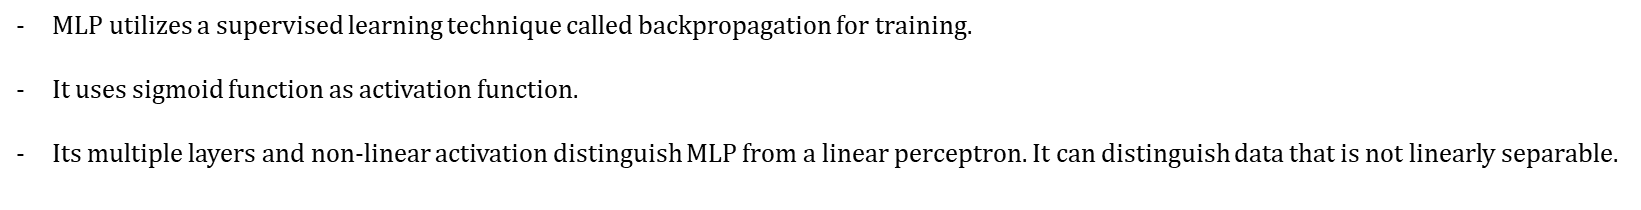

In [262]:
# Multilayer perceptron

from sklearn.neural_network import MLPClassifier       

mlp = MLPClassifier(max_iter=1024,verbose=True) # creating object for the Classifier
mlp.fit(X_train, y_train)

Iteration 1, loss = 0.32226541
Iteration 2, loss = 0.27122501
Iteration 3, loss = 0.25767948
Iteration 4, loss = 0.24396976
Iteration 5, loss = 0.23057421
Iteration 6, loss = 0.21985400
Iteration 7, loss = 0.21245976
Iteration 8, loss = 0.20759733
Iteration 9, loss = 0.20458726
Iteration 10, loss = 0.20187083
Iteration 11, loss = 0.20021137
Iteration 12, loss = 0.19806054
Iteration 13, loss = 0.19650798
Iteration 14, loss = 0.19605537
Iteration 15, loss = 0.19420487
Iteration 16, loss = 0.19302710
Iteration 17, loss = 0.19227749
Iteration 18, loss = 0.19059687
Iteration 19, loss = 0.18932301
Iteration 20, loss = 0.18885454
Iteration 21, loss = 0.18742851
Iteration 22, loss = 0.18645443
Iteration 23, loss = 0.18508425
Iteration 24, loss = 0.18505508
Iteration 25, loss = 0.18296784
Iteration 26, loss = 0.18288912
Iteration 27, loss = 0.18125700
Iteration 28, loss = 0.18026229
Iteration 29, loss = 0.17895223
Iteration 30, loss = 0.17846615
Iteration 31, loss = 0.17726723
Iteration 32, los

Iteration 254, loss = 0.10676649
Iteration 255, loss = 0.10646016
Iteration 256, loss = 0.10578831
Iteration 257, loss = 0.10589555
Iteration 258, loss = 0.10536870
Iteration 259, loss = 0.10683987
Iteration 260, loss = 0.10574742
Iteration 261, loss = 0.10618580
Iteration 262, loss = 0.10599518
Iteration 263, loss = 0.10548510
Iteration 264, loss = 0.10412898
Iteration 265, loss = 0.10551642
Iteration 266, loss = 0.10418850
Iteration 267, loss = 0.10509986
Iteration 268, loss = 0.10396665
Iteration 269, loss = 0.10399430
Iteration 270, loss = 0.10531510
Iteration 271, loss = 0.10317342
Iteration 272, loss = 0.10437641
Iteration 273, loss = 0.10341834
Iteration 274, loss = 0.10308108
Iteration 275, loss = 0.10354900
Iteration 276, loss = 0.10438692
Iteration 277, loss = 0.10380117
Iteration 278, loss = 0.10418520
Iteration 279, loss = 0.10273943
Iteration 280, loss = 0.10302715
Iteration 281, loss = 0.10219100
Iteration 282, loss = 0.10292520
Iteration 283, loss = 0.10350184
Iteration 

MLPClassifier(max_iter=1024, verbose=True)

In [263]:
print("Score of the MLP Model : ",mlp.score(X_test, y_test))

Score of the MLP Model :  0.9014244091939139


In [329]:
# Now we can evaluate the performance of the model

y_train_pred = mlp.predict_proba(X_train)[:,1]
y_validation_pred = mlp.predict_proba(X_validation,)[:,1]
y_test_pred = mlp.predict_proba(X_test)[:,1]

print("Multilayer Perceptron model")
print("-"*100)
print("Training")
auc, accuracy, recall, precision, specificity, f1 = print_report(y_train, y_train_pred, thresh)
print("Validation")
auc, accuracy, recall, precision, specificity, f1 = print_report(y_validation, y_validation_pred, thresh)
print("Testing")
auc, accuracy, recall, precision, specificity, f1 = print_report(y_test, y_test_pred, thresh)

Multilayer Perceptron model
----------------------------------------------------------------------------------------------------
Training
AUC : 0.989
Accuracy : 0.967
recall : 0.768
precision : 0.925
specificity : 0.992
f1 score : 0.839
Confusion Matrix : 
[[25374   203]
 [  755  2499]]
 
Validation
AUC : 0.917
Accuracy : 0.901
recall : 0.476
precision : 0.554
specificity : 0.953
f1 score : 0.512
Confusion Matrix : 
[[5249  258]
 [ 352  320]]
 
Testing
AUC : 0.912
Accuracy : 0.901
recall : 0.475
precision : 0.592
specificity : 0.957
f1 score : 0.527
Confusion Matrix : 
[[5230  234]
 [ 375  339]]
 


In [279]:
data.groupby('y').size()

y
0    36548
1     4640
dtype: int64

In [283]:
countNo = 36548
countYes = 4640
print('Percentage of "No": {:.3f}%'. format((countNo/(len(data.y))*100)))
print('Percentage of "Yes": {:.3f}%'. format((countYes/(len(data.y))*100)))

Percentage of "No": 88.735%
Percentage of "Yes": 11.265%


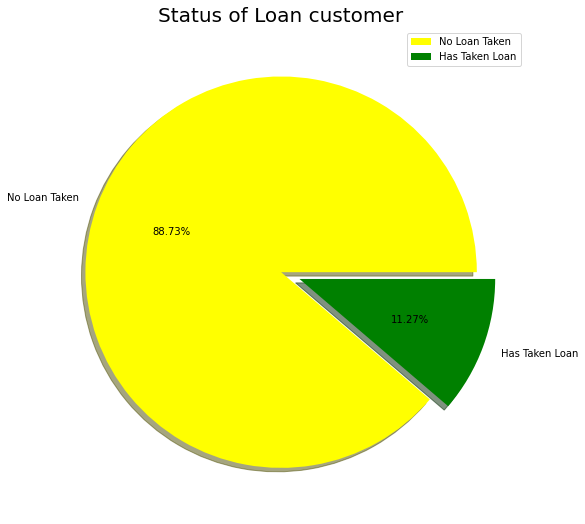

In [325]:
# lets see pie plot for Status of Loan customer
labels = ['No Loan Taken','Has Taken Loan']
size = data['y'].value_counts()
colors = ['yellow', 'green']
explode = [0, 0.1]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Status of Loan customer', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

# Conclusion
### After compairing all the applied model. We can conclude that Logistic regression is the best model. Because the accurecy score of the Logistic regression model is higest among all.